In [24]:
df = read.csv('csv/timeseries.csv')

In [25]:
str(df)

'data.frame':	20 obs. of  3 variables:
 $ 연도  : Factor w/ 5 levels "2010년","2011년",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ 분기  : int  1 2 3 4 1 2 3 4 1 2 ...
 $ 매출액: num  354 393 398 430 392 ...


In [38]:
df[['X']] <- 1:nrow(df)

In [41]:
reg <- lm(매출액~X,data=df)
reg


Call:
lm(formula = 매출액 ~ X, data = df)

Coefficients:
(Intercept)            X  
    379.869        5.728  


In [42]:
T = df[['X']]*reg$coefficients[2] + reg$coefficients[1]

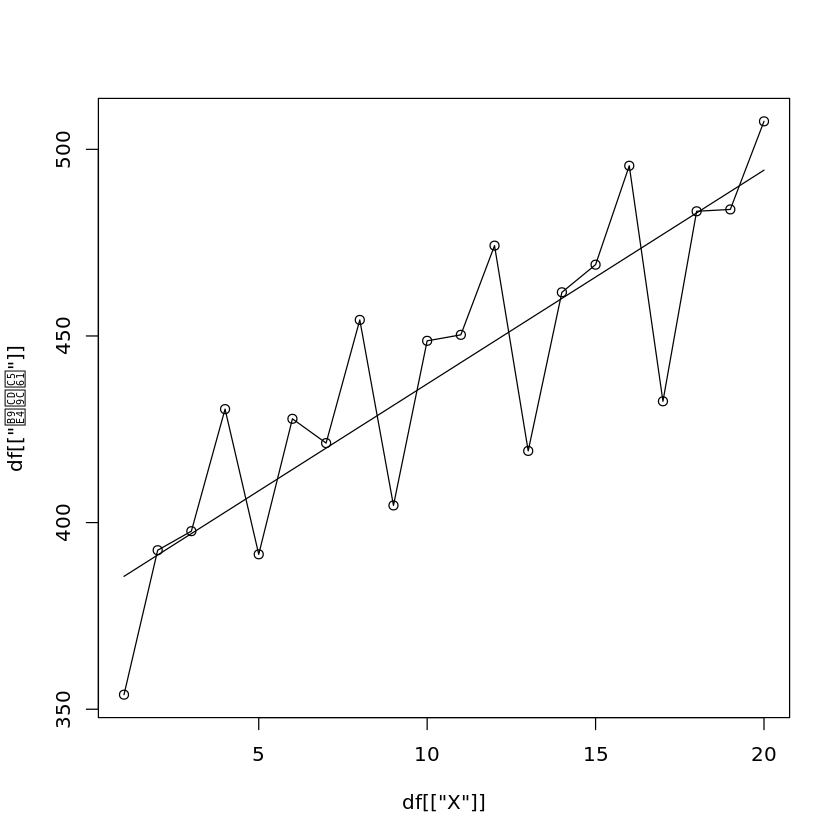

In [47]:
plot(df[['X']],df[['매출액']],type='p')
lines(df[['X']],df[['매출액']])
lines(df[['X']],T)

In [26]:
library(dplyr)
library(zoo)

In [27]:
df[['사분기이동평균']] <- rollmean(df[['매출액']],4, fill=NA, align='center')

In [28]:
df[['중심이동평균']] <- rollmean(df[['사분기이동평균']],2, fill=NA, align='right')

In [29]:
df[['특정계절지수']] <- df[['매출액']] / df[['중심이동평균']]

In [31]:
group <- group_by(df,분기)
s_coeff <- summarise(group,대표계절지수=mean(특정계절지수,na.rm=T))
s_coeff

분기,대표계절지수
<int>,<dbl>
1,0.9281004
2,1.0138694
3,1.0027187
4,1.0571153


In [32]:
df[['대표계절지수']] <- c(s_coeff[['대표계절지수']], rep(NA,nrow(df)-nrow(s_coeff)))


In [33]:
df[['수정된대표계절지수']] <- df[['대표계절지수']] / sum(df[['대표계절지수']],na.rm=T) * 4

In [36]:
df[['계절변동']] <- rep(df[['수정된대표계절지수']][1:4],5)

In [37]:
df

연도,분기,매출액,사분기이동평균,중심이동평균,특정계절지수,대표계절지수,수정된대표계절지수,계절변동
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010년,1,353.9,NA,NA,NA,0.9281004,0.927682,0.927682
2010년,2,392.6,393.650,NA,NA,1.0138694,1.013412,1.013412
2010년,3,397.7,403.050,398.3500,0.9983683,1.0027187,1.002267,1.002267
2010년,4,430.4,411.850,407.4500,1.0563259,1.0571153,1.056639,1.056639
2011년,1,391.5,417.750,414.8000,0.9438284,NA,NA,0.927682
2011년,2,427.8,423.725,420.7375,1.0167860,NA,NA,1.013412
2011년,3,421.3,427.000,425.3625,0.9904493,NA,NA,1.002267
2011년,4,454.3,432.225,429.6125,1.0574646,NA,NA,1.056639
2012년,1,404.6,439.475,435.8500,0.9283010,NA,NA,0.927682


In [48]:
S <- df[['계절변동']]

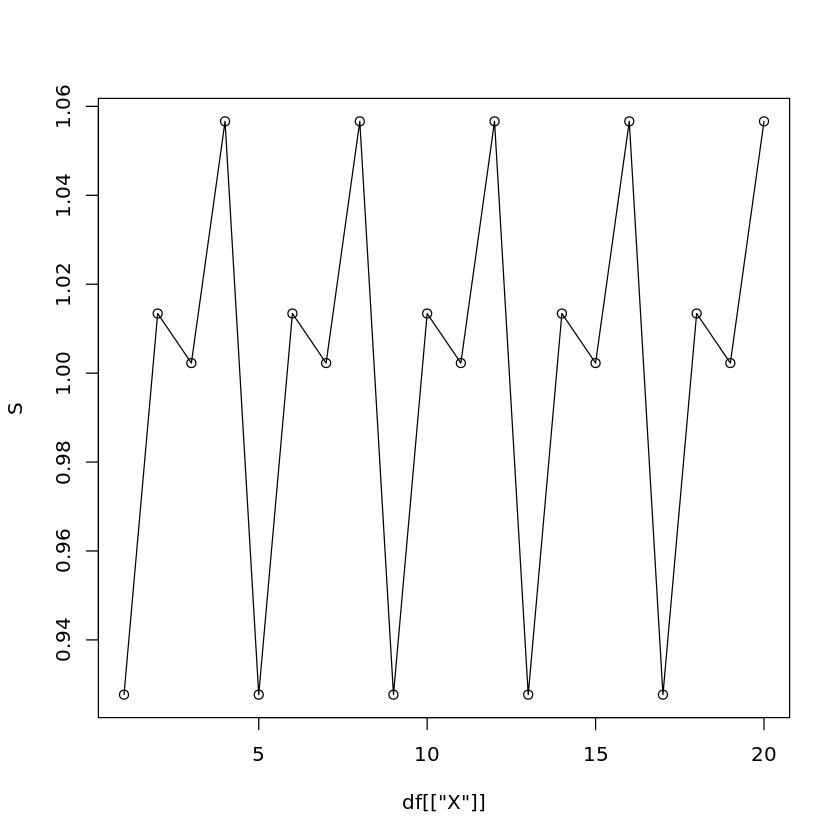

In [52]:
plot(df[['X']],S,type='p')
lines(df[['X']],S)

In [49]:
CI <- df[['매출액']] / T / S

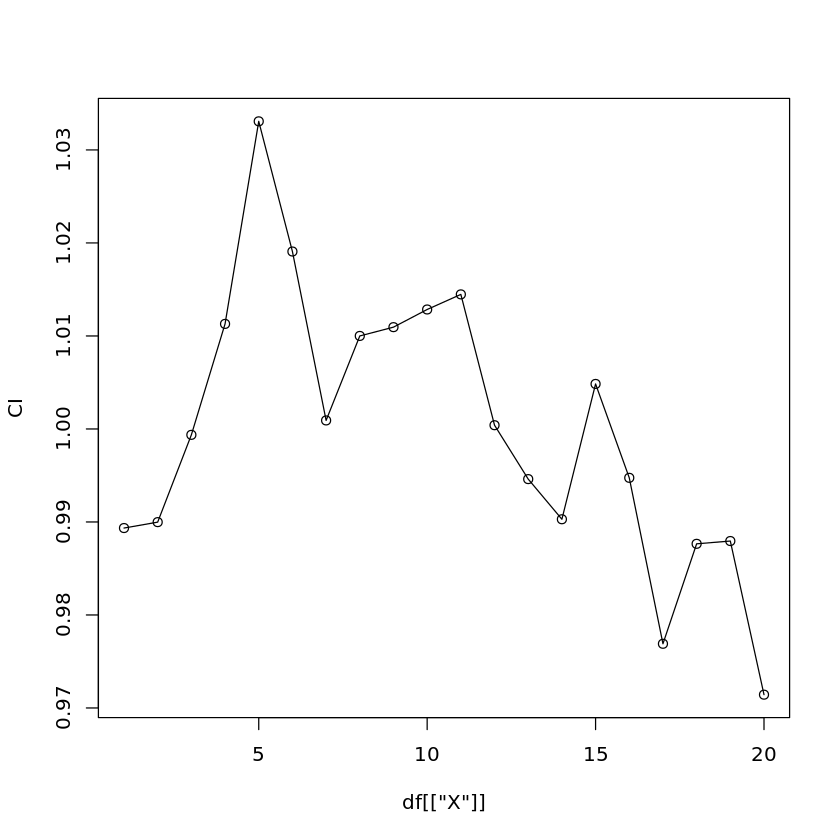

In [51]:
plot(df[['X']],CI,type='p')
lines(df[['X']],CI)

In [55]:
df2 <- df['매출액']
df2[['추세변동']] <- T
df2[['계절변동']] <- S
df2[['순환및불규칙변동']] <- CI

In [59]:
df2[['순환변동']] <- rollmean(df2[['순환및불규칙변동']],3, fill=NA, align='right')

In [61]:
df2[['불규칙변동']]  <- CI / df2[['순환변동']] 

In [62]:
df2

매출액,추세변동,계절변동,순환및불규칙변동,순환변동,불규칙변동
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
353.9,385.5971,0.927682,0.9893447,NA,NA
392.6,391.3248,1.013412,0.9899807,NA,NA
397.7,397.0525,1.002267,0.9993655,0.9928969,1.0065148
430.4,402.7802,1.056639,1.0112945,1.0002135,1.0110786
391.5,408.5078,0.927682,1.0330759,1.0145786,1.0182315
427.8,414.2355,1.013412,1.0190776,1.0211493,0.9979712
421.3,419.9632,1.002267,1.0009144,1.0176893,0.9835167
454.3,425.6908,1.056639,1.0100012,1.0099977,1.0000034
404.6,431.4185,0.927682,1.0109460,1.0072872,1.0036324


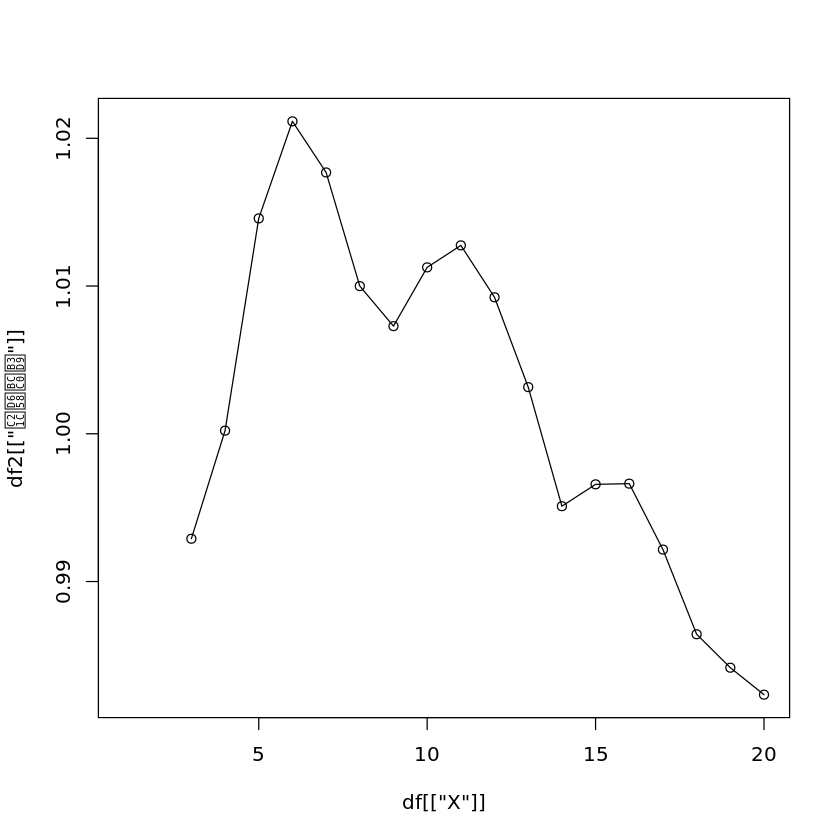

In [63]:
plot(df[['X']],df2[['순환변동']],type='p')
lines(df[['X']],df2[['순환변동']])

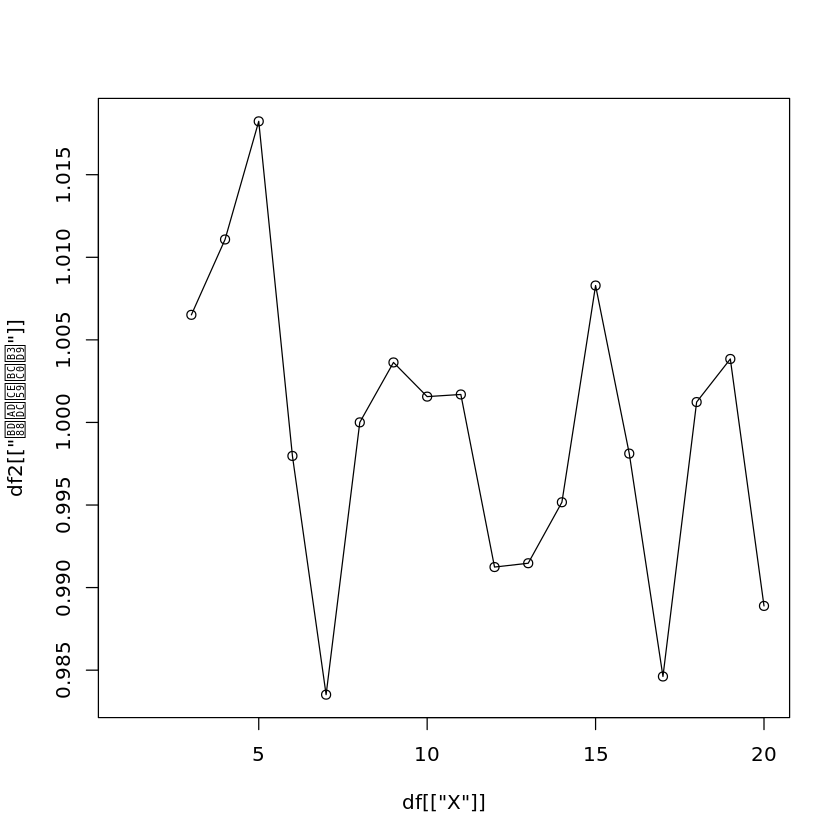

In [64]:
plot(df[['X']],df2[['불규칙변동']],type='p')
lines(df[['X']],df2[['불규칙변동']])